# Phase B - Building the model & Executing classification

In [1]:
import pandas as pd

dataMapPath = 'dataSet/data-mapping.csv'
dataMap = pd.read_csv(dataMapPath)
dataMap['Class'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Class, dtype: int64

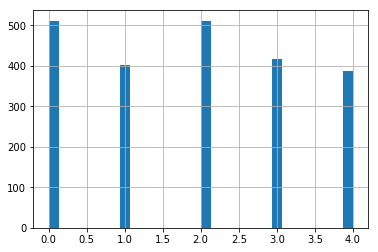

In [2]:
# Plotting the 'Class' feature disribution using the equivalent 'Class-Num' 
%matplotlib inline
dataMap['Class_Num'].hist(rwidth=1, bins=30)

In [3]:
X = dataMap['Content']
y = dataMap['Class_Num']
print(X.shape)
print(y.shape)

(2225,)
(2225,)


### Splitting the data to 'train' & 'test':

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1668,)
(557,)
(1668,)
(557,)


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

### Classification using 'Naive Bayes' Algorithm:


In [6]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
nb_score = nb.score(X_test_dtm, y_test)
nb_score

0.98563734290843807

### Classification using 'Random-Forest' Algortihm:

In [7]:
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier with 200 trees
forest = RandomForestClassifier(n_estimators=200)
forest.fit(X_train_dtm, y_train)
forest_score = forest.score(X_test_dtm, y_test)
forest_score

0.96050269299820468

### Comparing the classifiers using '5-Fold Cross-Validation':

NB: 0.965228


RF: 0.908878


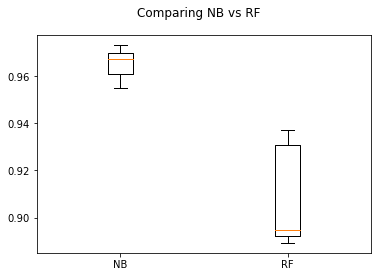

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import model_selection
seed = 7
models = list()
results = list()
names = list()
models.append(('NB', MultinomialNB()))
models.append(('RF', RandomForestClassifier()))
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    kfold_cv_result = model_selection.cross_val_score(model, X_train_dtm, y_train, cv=kfold, scoring='accuracy')
    results.append(kfold_cv_result)
    names.append(name)
    msg = "%s: %f" % (name, kfold_cv_result.mean())
    print(msg)
fig = plt.figure()
fig.suptitle('Comparing NB vs RF')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)